In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


In [4]:
users = dataset.shape[0] - 9000
ads = dataset.shape[1]
no_of_selections_of_ad = [0] * ads
no_of_rewards_of_ad = [0.0] * ads #upto user
ads_selected = []
total_reward = 0
upper_bound = 0
for user in range(users):
    ad = 0
    max_upper_bound = 0
    for i in range(ads):
        if no_of_selections_of_ad[i] == 0:
            upper_bound = 1e400
        else:
            average_reward = no_of_rewards_of_ad[i]/no_of_selections_of_ad[i]
            delta_i = math.sqrt(3.0/2.0 * math.log(user + 1)/no_of_selections_of_ad[i])
            upper_bound = average_reward + delta_i
        if(max_upper_bound < upper_bound):
            max_upper_bound = upper_bound
            ad = i
    no_of_selections_of_ad[ad] += 1
    reward = dataset.values[user, ad]
    no_of_rewards_of_ad[ad] += reward
    ads_selected += [ad]
    total_reward += reward

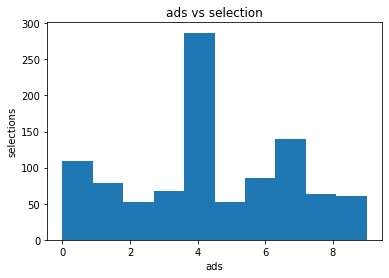

In [5]:
plt.hist(ads_selected)
plt.xlabel('ads')
plt.ylabel('selections')
plt.title('ads vs selection')
plt.show()